 K mean image segmentation

In [16]:
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import cv2
path = 'Resources/image.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
cv2.imshow('img',result_image)
cv2.waitKey(0)

-1

Image Segmentation using Contour Detection

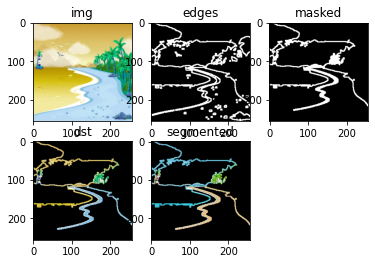

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = 'Resources/image.jpg'
img = cv2.imread(path)
img = cv2.resize(img,(256,256))
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

titles = ["img", "edges", "masked", "dst", "segmented"]
images = [img, edges, masked, dst, segmented]

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])

plt.show()

Image Segmentation using Thresholding

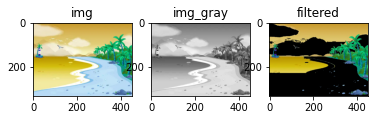

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='Resources\image.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)

titles = ["img","img_gray","filtered"]
images = [img,img_gray,filtered]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
plt.show()

Segmentation using Color Masking

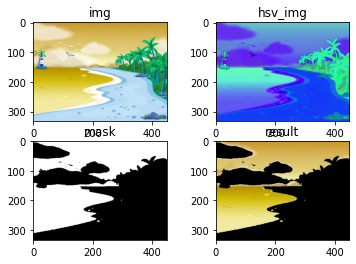

In [19]:
import cv2
path ='Resources\image.jpg'
img = cv2.imread(path)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

light_blue = (90, 70, 50)
dark_blue = (128, 255, 255)
# You can use the following values for green
# light_green = (40, 40, 40)
# dark_greek = (70, 255, 255)
mask = cv2.inRange(hsv_img, light_blue, dark_blue)

result = cv2.bitwise_and(img, img, mask=mask)

titles = ['img', 'hsv_img', 'mask', 'result']
images = [img, hsv_img, mask, result]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],"gray")
    plt.title(titles[i])
plt.show()